### Basic data analysis or exploratory data analysis (EDA)

In [37]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Model Evaluation Function
def model_performance(y_test, y_pred) :
    #Show metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    print(f'Accuracy :{Accuracy}')
    print(f'Precision :{Precision}')
    print(f'Recall :{Recall}')
    print(f'F1_score :{F1_score}')

    return Accuracy, Precision, Recall, F1_score

In [40]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('/Users/stevencheong/STAT3011/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [41]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [42]:
training_data

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [43]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [44]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [45]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [46]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

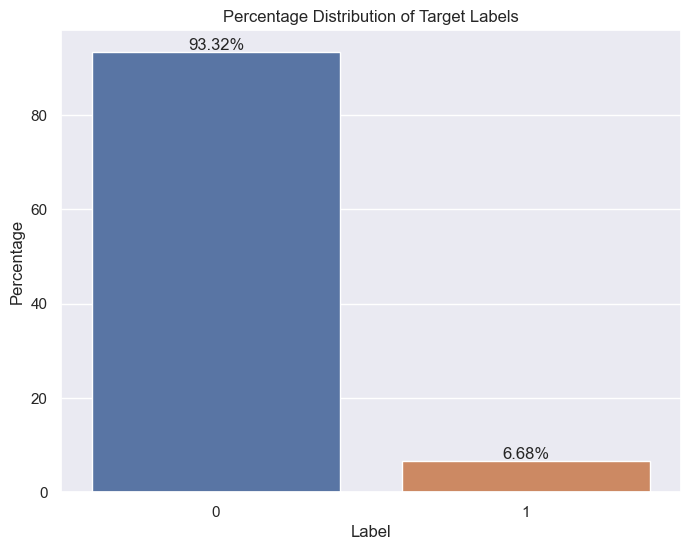

In [47]:
# Revised Plot
# Plotting the percentage distribution
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_labels.index, y=percentage_labels.values)
ax.set_title('Percentage Distribution of Target Labels')
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{:.2f}%'.format(height), ha="center")
plt.show()


### Missing values

In [48]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

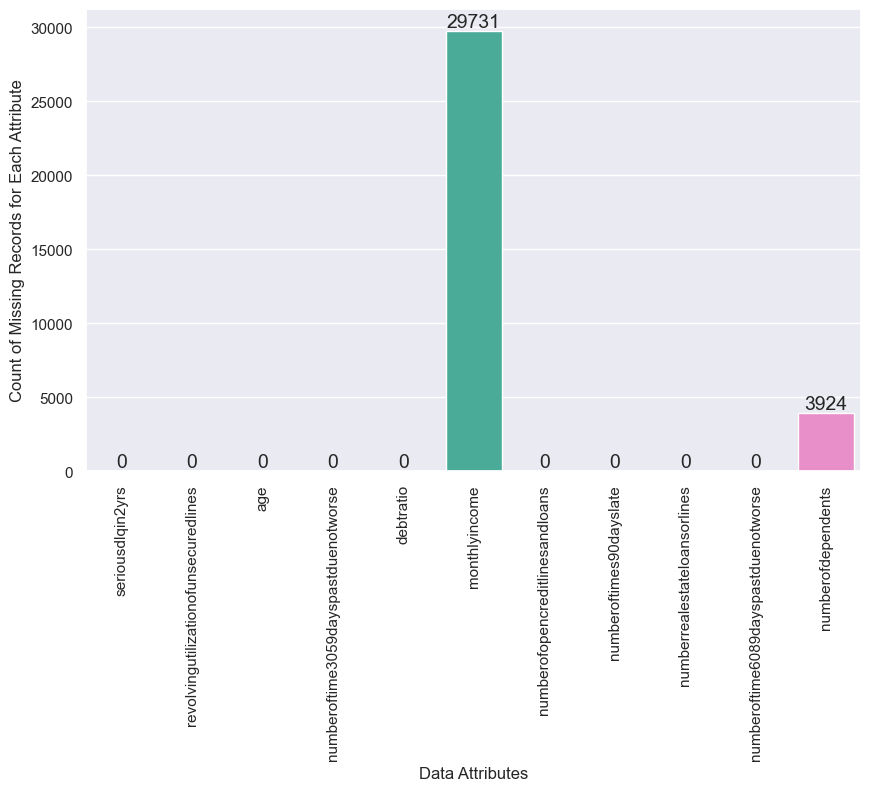

In [49]:
# revised code 
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=x, y=y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of Missing Records for Each Attribute")
plt.xticks(rotation=90)
plt.show()

In [50]:
training_data = training_data.dropna()

In [51]:
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
numberoftime3059dayspastduenotworse,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
debtratio,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
monthlyincome,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
numberofopencreditlinesandloans,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
numberoftimes90dayslate,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
numberrealestateloansorlines,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997
numberoftime6089dayspastduenotworse,-0.000955,-0.043501,0.980131,-0.001801,-0.011116,-0.061505,0.989277,-0.034118,1.000000,-0.005092
numberofdependents,0.002347,-0.206397,0.003538,0.009803,0.062647,0.038342,-0.003779,0.118997,-0.005092,1.000000


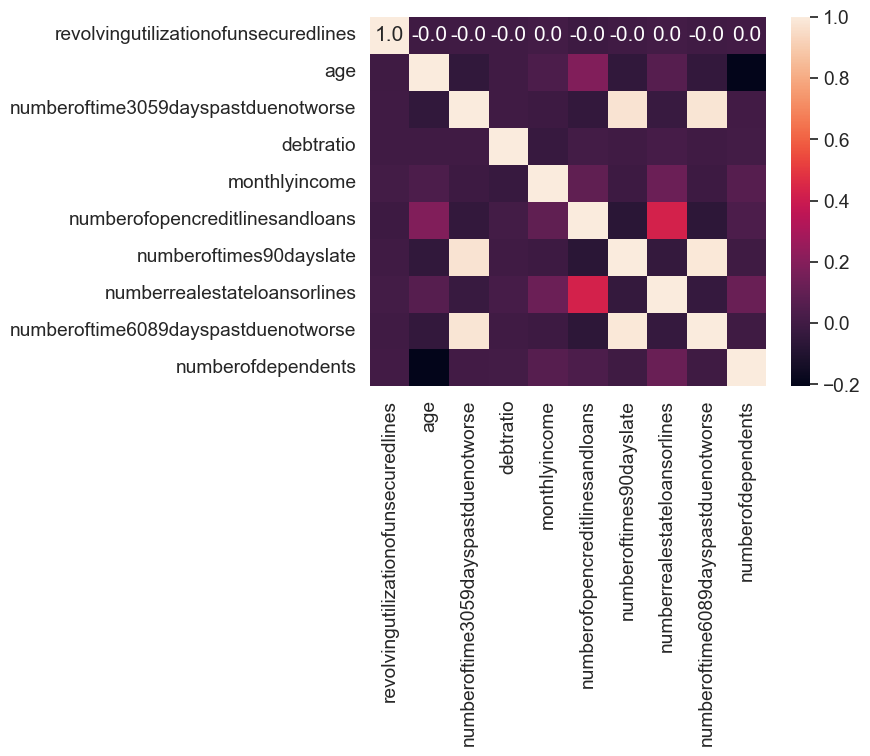

In [52]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

In [53]:
training_data.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [54]:
# drop 3 columns with high correlation
training_data = training_data.drop(['numberoftime3059dayspastduenotworse', 'numberoftimes90dayslate', 'numberoftime6089dayspastduenotworse'], axis=1)

### Outliers Detection

In [55]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [56]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

In [57]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)

In [58]:
# Revised version
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))  # Convert zip object to list
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [59]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

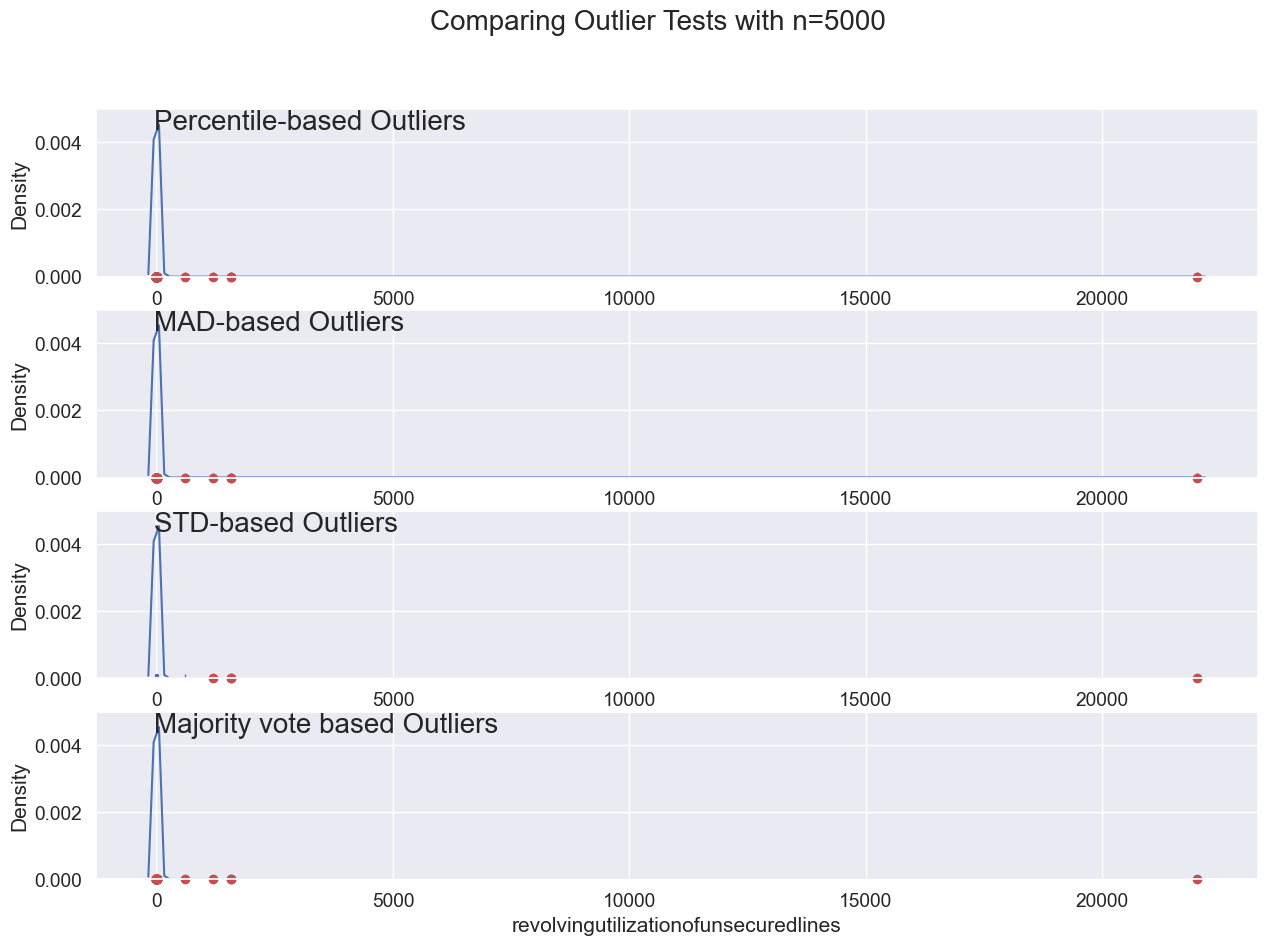

In [60]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

In [61]:
training_data.revolvingutilizationofunsecuredlines.median()

0.177282104

In [62]:
condition_1 = training_data.revolvingutilizationofunsecuredlines > 0.99999

In [63]:
# proportion of data larger than 1
condition_1.sum() / len(training_data.revolvingutilizationofunsecuredlines)

0.08521730454231764

<Axes: >

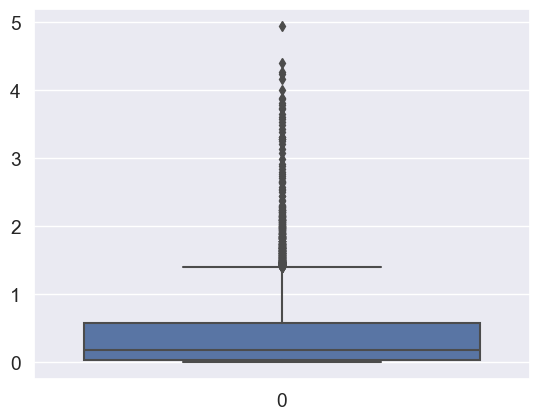

In [64]:
sns.boxplot(training_data.revolvingutilizationofunsecuredlines[training_data.revolvingutilizationofunsecuredlines < 5])

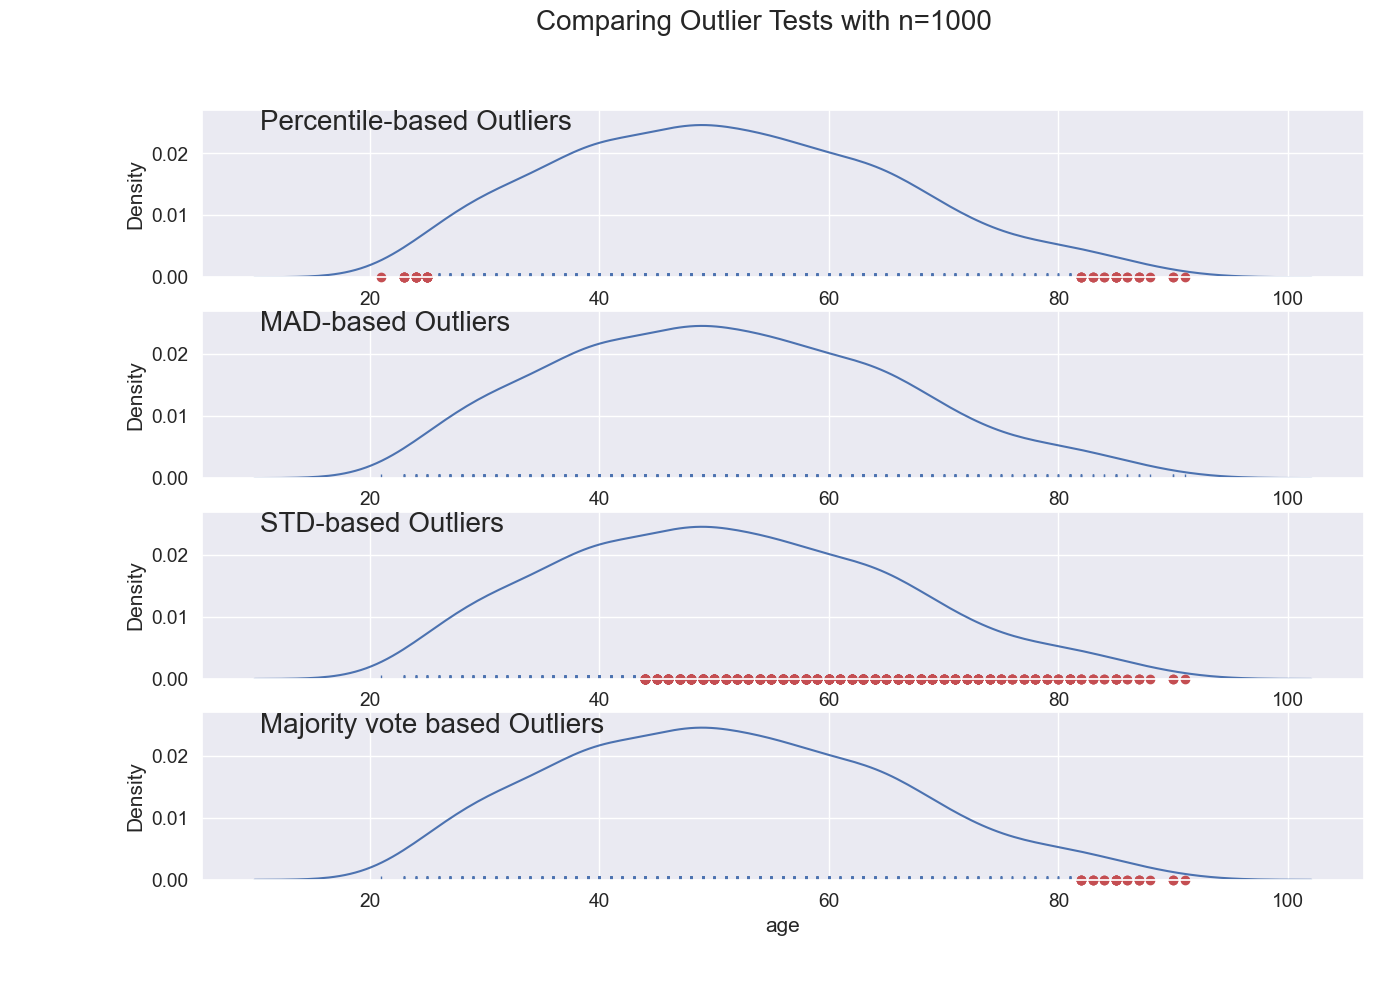

In [65]:
plotOutlier(training_data.age.sample(1000))

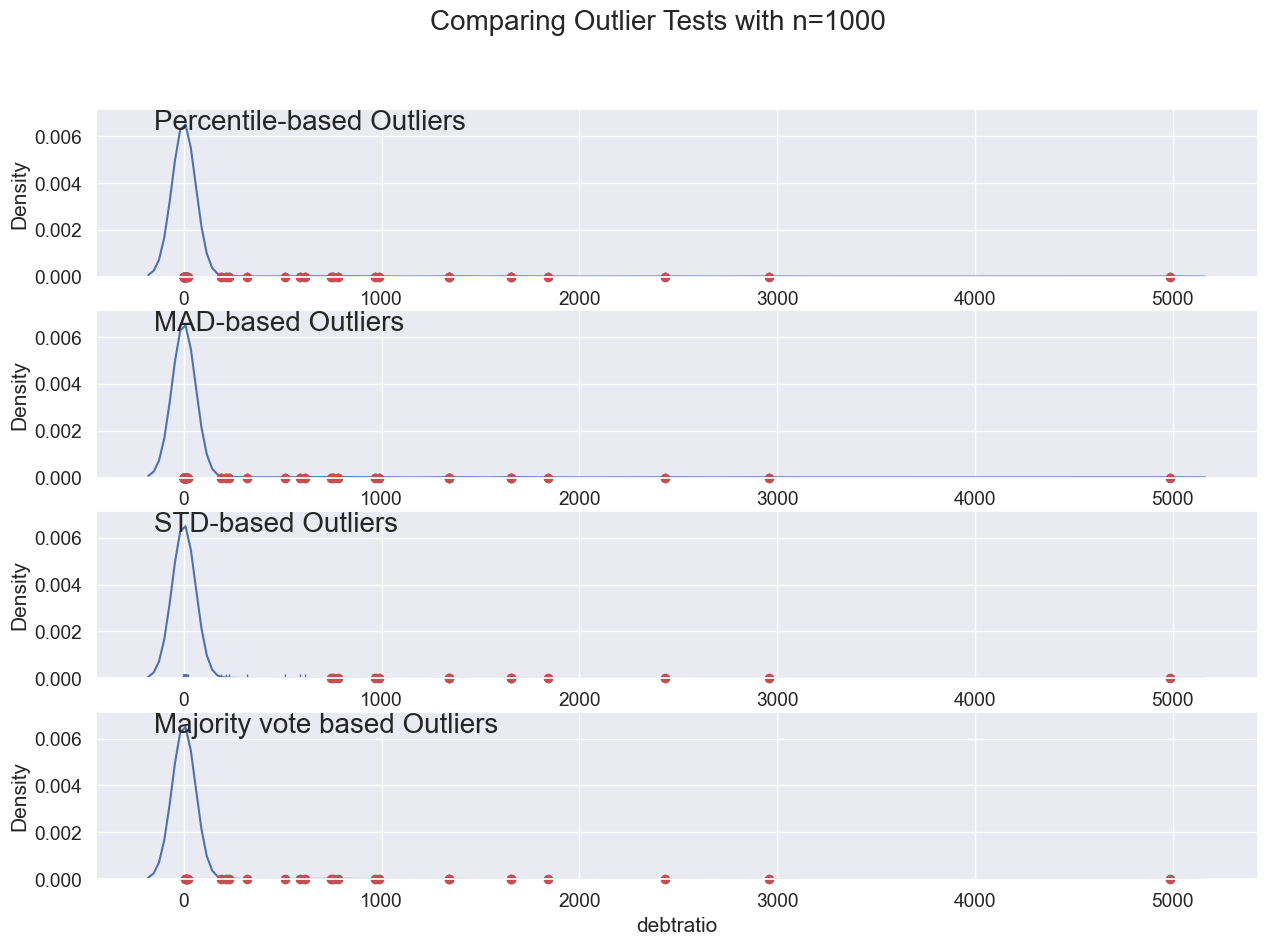

In [77]:
plotOutlier(training_data.debtratio.sample(1000))

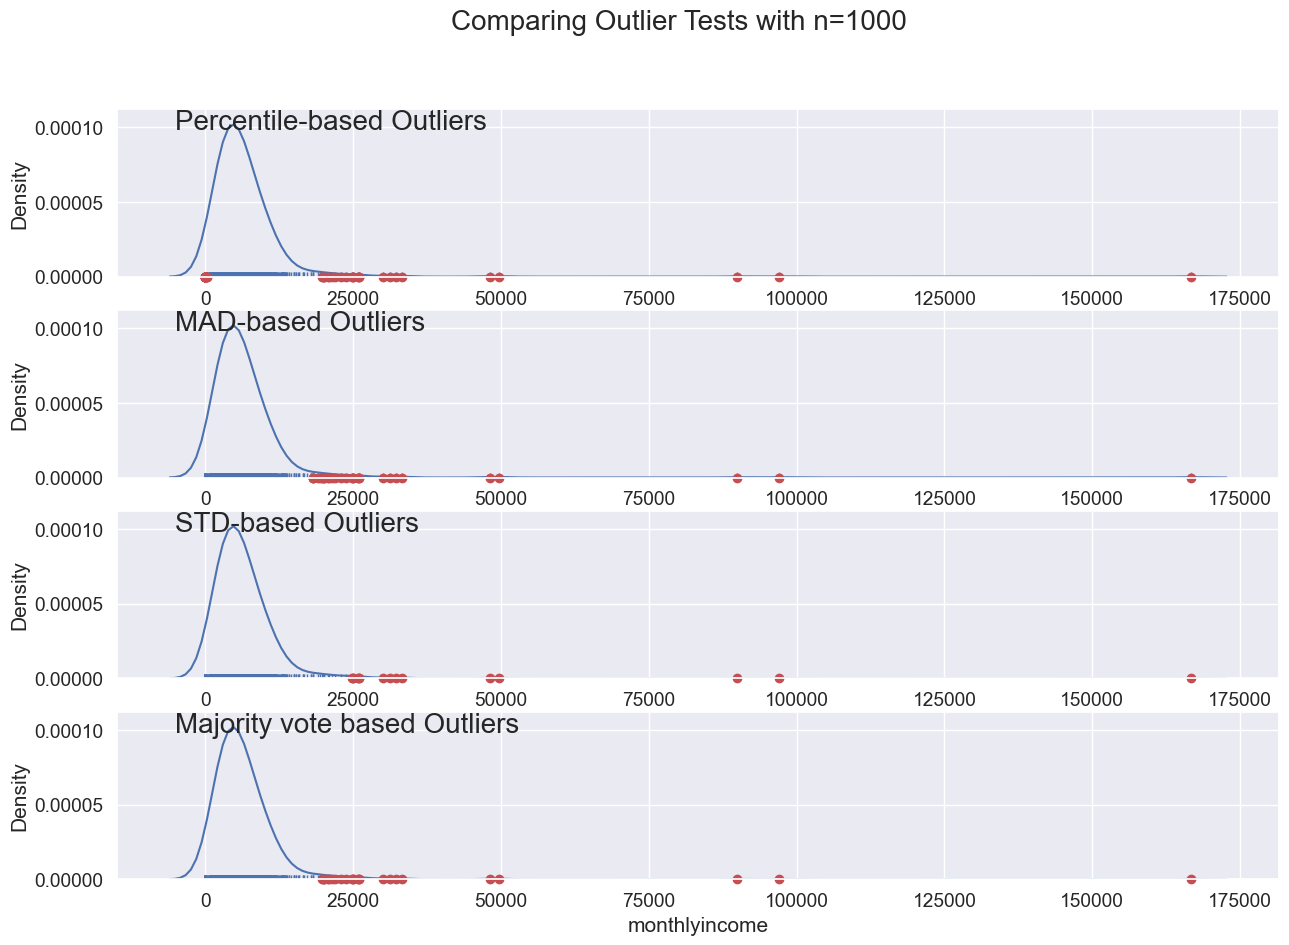

In [78]:
plotOutlier(training_data.monthlyincome.sample(1000))

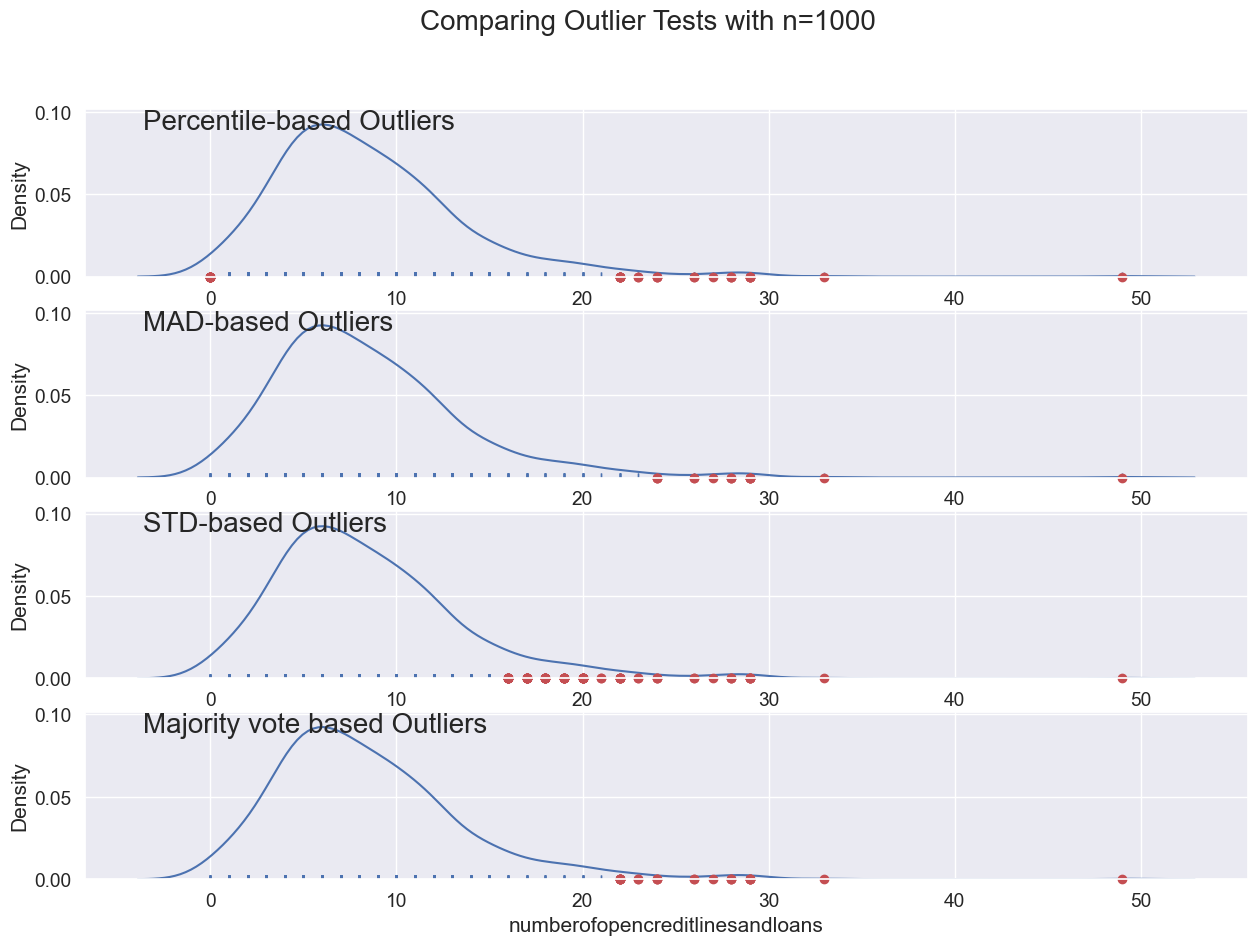

In [79]:
plotOutlier(training_data.numberofopencreditlinesandloans.sample(1000))

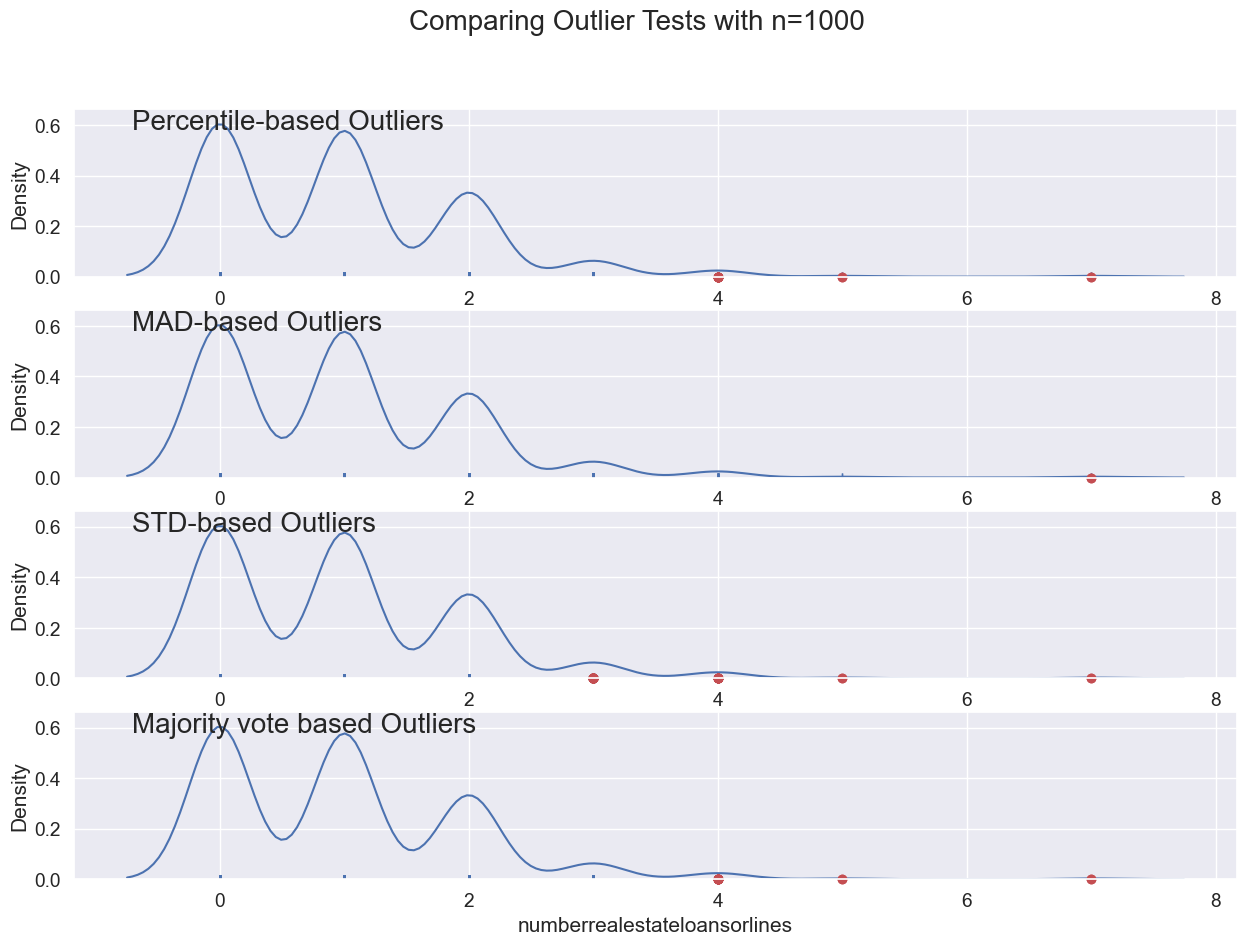

In [81]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

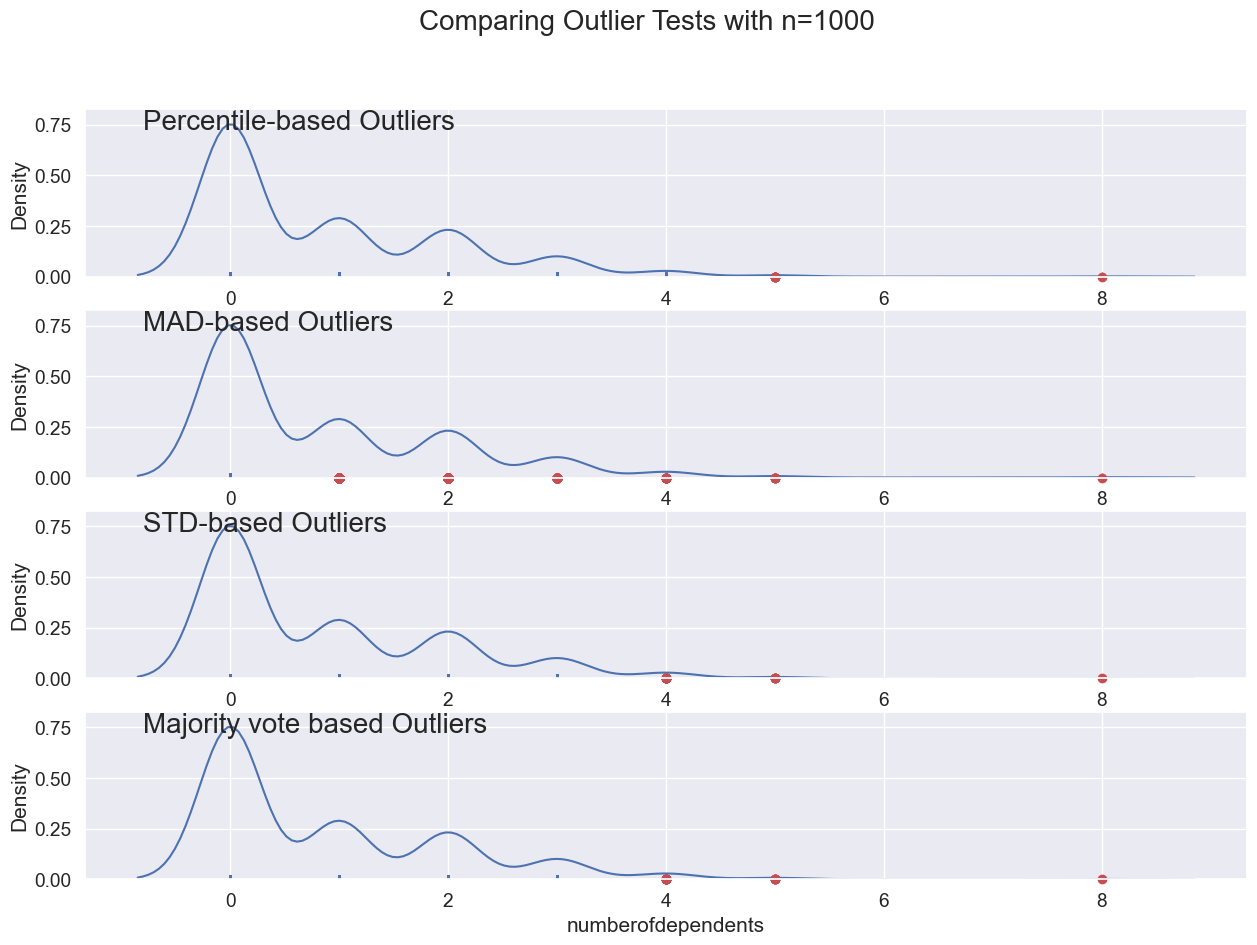

In [83]:
plotOutlier(training_data.numberofdependents.sample(1000))

### Handle the outliers

In [84]:
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

In [85]:
import collections
collections.Counter(training_data.age)

Counter({45: 2969,
         40: 2645,
         38: 2266,
         30: 1674,
         49: 3217,
         74: 1059,
         39: 2566,
         57: 2699,
         51: 3001,
         46: 3117,
         76: 839,
         64: 2278,
         53: 2974,
         43: 2751,
         25: 797,
         32: 1804,
         58: 2702,
         50: 3105,
         69: 1443,
         24: 652,
         28: 1349,
         42: 2633,
         75: 860,
         26: 1012,
         52: 2951,
         41: 2660,
         31: 1783,
         68: 1613,
         70: 1270,
         62: 2725,
         73: 1093,
         29: 1468,
         55: 2745,
         35: 1930,
         60: 2505,
         67: 1835,
         27: 1126,
         36: 2056,
         56: 2846,
         37: 2157,
         66: 1874,
         83: 317,
         34: 1867,
         44: 2820,
         80: 621,
         47: 3134,
         61: 2713,
         59: 2574,
         77: 775,
         48: 3163,
         81: 530,
         63: 2802,
         54: 2905,
 

In [86]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
training_data.age = ageNew

In [89]:
#  Aims to compute the ratio of outliers detected by different outlier detection methods
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(training_data.debtratio)

{'percentile_based_outlier': [6014, '5.00%'],
 'mad_based_outlier': [5791, '4.82%'],
 'std_div': [847, '0.70%'],
 'outlierVote': [3007, '2.50%']}

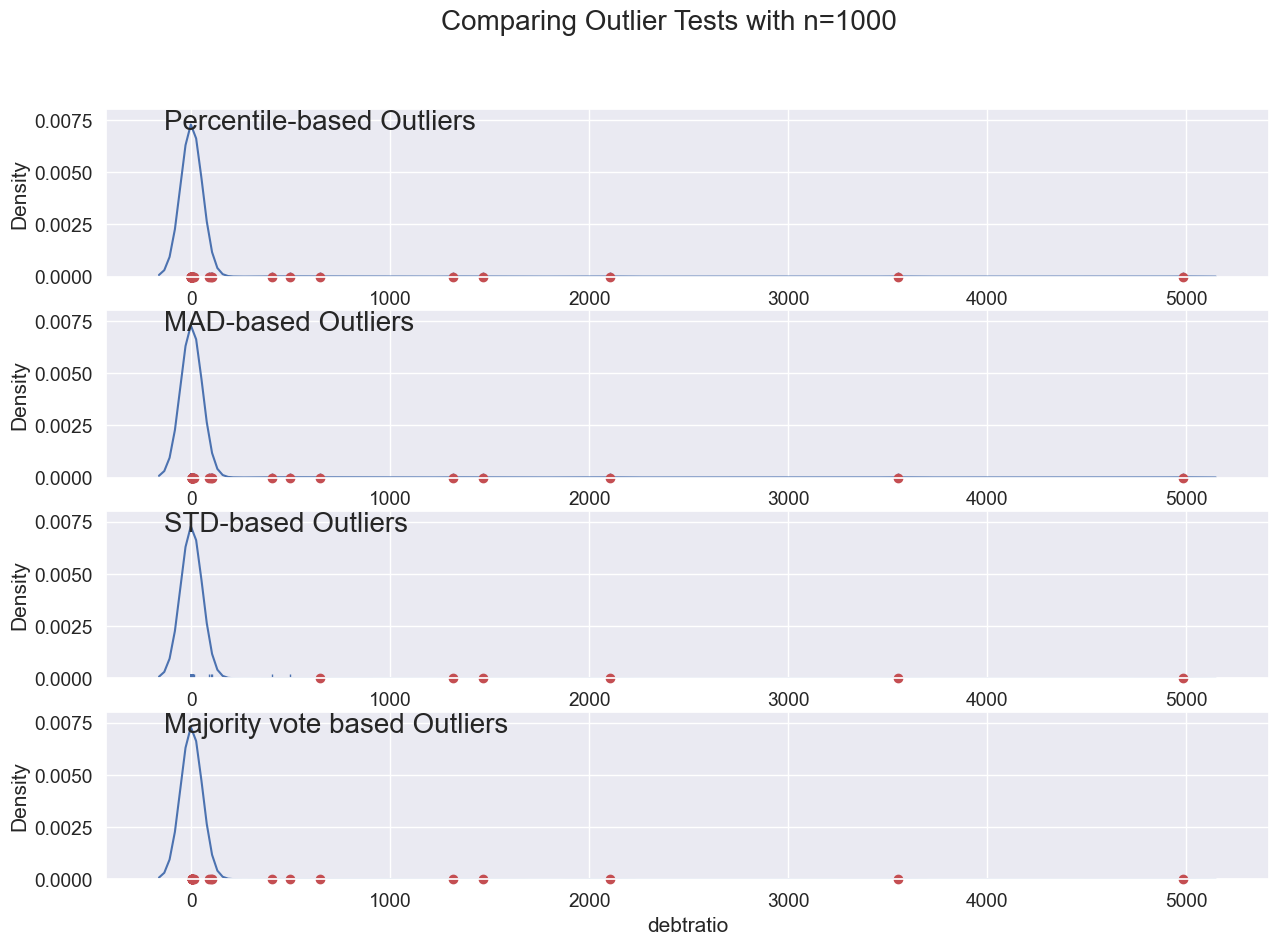

In [90]:
plotOutlier(training_data.debtratio.sample(1000))

In [91]:
X_1 = mad_based_outlier(training_data.debtratio).sum()/len(training_data.debtratio)
X_2 = 1- X_1

proportion_debtration = [X_1, X_2]

In [92]:
proportion_debtration

[0.04815039619519577, 0.9518496038048042]

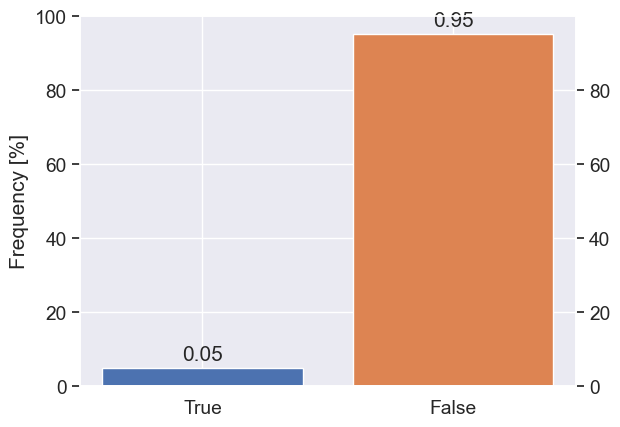

In [93]:
def add_freq(ax, proportions):
    ax2 = ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    for i, proportion in enumerate(proportions):
        ax.bar(i, proportion * 100)
        ax.text(i, proportion * 100 + 2, f'{proportion:.2f}', ha='center')

    ax.set_xticks(range(len(proportions)))
    ax.set_xticklabels(['True', 'False']) 

    ax2.set_ylim(0, 100)
    ax2.grid(None)

proportions = proportion_debtration

# Creating a bar plot with the proportions
fig, ax = plt.subplots()
add_freq(ax, proportions)
plt.show()


In [94]:
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

In [95]:
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio 

In [96]:
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    funcs = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    titles = ['Percentile-based', 'MAD-based', 'STD-based', 'Majority vote based']
    
    for ax, func, title in zip(axes, funcs, titles):
        mask_outliers = np.array(func(x))  # Ensure that mask_outliers is a NumPy array
        n_outliers = np.sum(mask_outliers)
        nOutliers.append(n_outliers)
        outlier_free = x[~mask_outliers]  # Use the mask to filter non-outliers
        sns.distplot(outlier_free, ax=ax, rug=True, hist=False)
        ax.set_title(f'{title} Outliers, removed: {n_outliers}', y=0.95, x=0.05, ha='left', va='top', size=15)
        
    fig.suptitle(f'Outlier Removed By Method with n={len(x)}', size=20)
    fig.set_size_inches(15, 10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

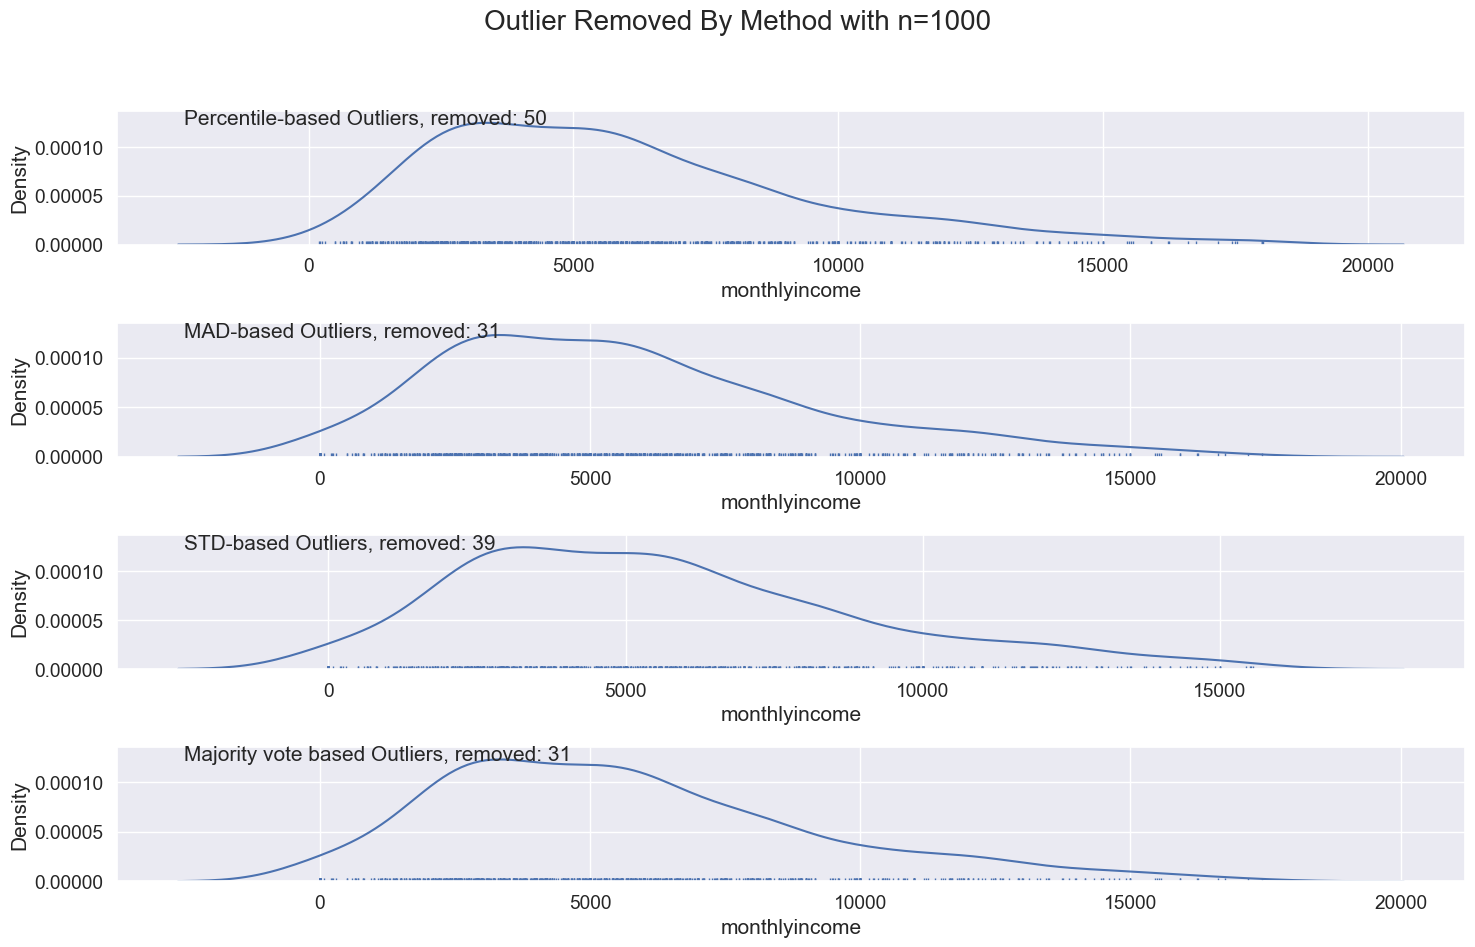

In [97]:
plotOutlierFree(training_data.monthlyincome.sample(1000))

In [98]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [99]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

In [100]:
training_data.monthlyincome = incomeNew

In [102]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [105]:
collections.Counter(training_data.numberrealestateloansorlines)

Counter({6: 282,
         0: 43430,
         1: 41722,
         4: 1839,
         2: 26646,
         3: 5367,
         5: 585,
         8: 79,
         7: 142,
         9: 64,
         17: 3,
         10: 33,
         12: 17,
         11: 16,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 1,
         13: 14,
         15: 5,
         23: 1,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [106]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [109]:
collections.Counter(training_data.numberofdependents)

Counter({2.0: 18110,
         1.0: 24379,
         0.0: 65456,
         3.0: 8745,
         4.0: 2658,
         5.0: 689,
         6.0: 150,
         8.0: 22,
         7.0: 49,
         20.0: 1,
         10.0: 5,
         9.0: 4,
         13.0: 1})

In [110]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [111]:
training_data.numberofdependents = depNew

## Train and build baseline model

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
import lightgbm as lgb

In [113]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Gradientboosting Classifier

In [115]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200)

In [116]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=200)

In [117]:
gbMod.score(X_test, y_test)

0.9290940534787814

In [118]:
test_labels=gbMod.predict(X_test)

In [119]:
model_performance(test_labels, y_test)

Accuracy :0.9290940534787814
Precision :0.010823529411764706
Recall :0.4339622641509434
F1_score :0.021120293847566574


(0.9290940534787814,
 0.010823529411764706,
 0.4339622641509434,
 0.021120293847566574)

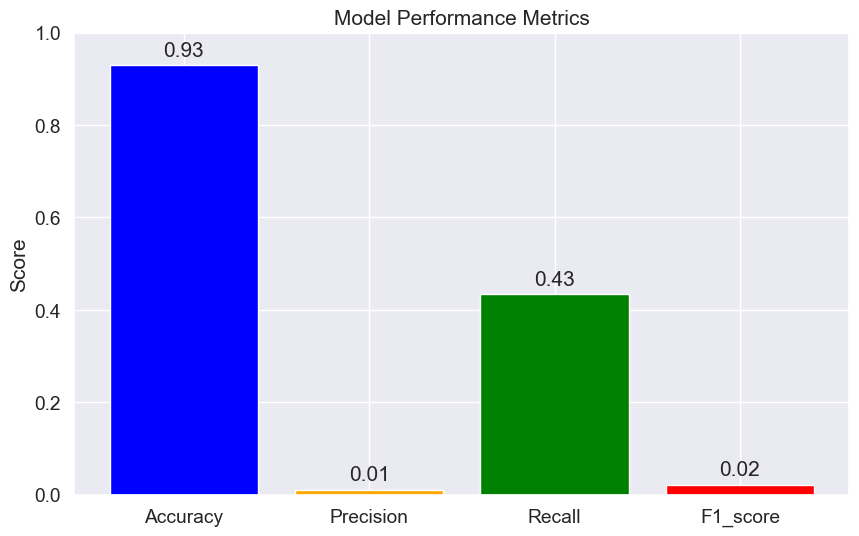

In [120]:
import matplotlib.pyplot as plt

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [0.9290940534787814, 0.010823529411764706, 0.4339622641509434, 0.021120293847566574]

# Creating the bar plot
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red']) # You can customize the colors

plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) # Assuming all values are between 0 and 1

# Display the values on the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center')

plt.show()
